# Business Performance Analysis: Comparing Target Amount with Sales, Customer Metrics, and Profit Trends ~ [Sadaat Tameem]

## Data Analysis

#### Importing packages

In [1]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
%matplotlib inline

In [2]:
pwd #displaying the current path

'/Users/sadaattameem/Desktop/Python mid term'

In [3]:
#Reading csv data and storing in 3 different dataframes
orders_list= pd.read_csv("List of Orders.csv")
orders_details= pd.read_csv("Order Details.csv")
orders_target = pd.read_csv("Sales target.csv")

In [4]:
#this data is about orders placed by customers and their demographics
orders_list.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [5]:
#this data is about order transaction details
orders_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [6]:
#this data is about monthly target set for catergory
orders_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


## Data Cleaning
### Checking the dataset

In [7]:
#checking what's there in the data
orders_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [8]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [9]:
orders_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [12]:
#Changing the data type of orderdate to date (currently it is object)
orders_list["Order Date"] = pd.to_datetime(orders_list["Order Date"])

In [11]:
# view the datatype again
orders_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.0+ KB


### Viewing Null Values

In [13]:
print(orders_list[orders_list["Order ID"].isnull()==True].shape)
if orders_list.isnull().values.any():
    print("There are null values present")
else:
    print("There are no null values present")

#this will be True if any null values

(60, 5)
There are null values present


In [14]:
print(orders_details[orders_details["Order ID"].isnull()==True].shape)
if orders_details.isnull().values.any():#this will be True if any null values
    print("There are null values")
else:
    print("There are no null values present")

(0, 6)
There are no null values present


In [15]:
print(orders_target[orders_target["Month of Order Date"].isnull()==True].shape)
if orders_target.isnull().values.any():#this will be True if any null values
    print("There are null values")
else:
    print("There are no null values present")

(0, 3)
There are no null values present


### Dropping/Removing the null values

In [16]:
orders_list.shape

(560, 5)

In [17]:
#We have null values in orders list dataset- we need to remove it as all the other columns are null
orders_list=orders_list.dropna(how='all',axis=0)

In [18]:
#Viewing the data after removing the null values
orders_list

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
495,B-26096,2019-03-28,Atharv,West Bengal,Kolkata
496,B-26097,2019-03-28,Vini,Karnataka,Bangalore
497,B-26098,2019-03-29,Pinky,Jammu and Kashmir,Kashmir
498,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai


## Merging Data Set 

In [19]:
#Only merging Orders details and orders list dataframes 
combined=orders_details.merge(orders_list,left_on="Order ID", right_on= 'Order ID', how='left')
if combined.isnull().values.any():#this will be True if any null values
    print("There are null values")
else:
    print("There are no null values present")

There are no null values present


In [20]:
#viewing the combined data
combined.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,2018-01-04,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,2018-01-04,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,2018-01-04,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,2018-01-04,Pearl,Maharashtra,Pune


In [21]:
#Rearranging the columns 
combined=combined[["Order ID","Order Date","CustomerName","State","City","Category","Sub-Category","Amount","Profit","Quantity"]]
combined.head()

,Order ID,Order Date,CustomerName,State,City,Category,Sub-Category,Amount,Profit,Quantity
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Furniture,Bookcases,1275.0,-1148.0,7
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Stole,66.0,-12.0,5
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Hankerchief,8.0,-2.0,3
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Electronics,Electronic Games,80.0,-56.0,4
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,Electronics,Phones,168.0,-111.0,2


## Research Questions
* Who are my top 5 customers by sales
* Which is the most profitable Category and Sub-category
* Is my top line growth increasing over time?
* Is my bottom line growth increasing over time?
* Which State/city is we get the highest sales from?
* Did we meet the target?

In [22]:
#Viewing the combined data set
combined.head()

,Order ID,Order Date,CustomerName,State,City,Category,Sub-Category,Amount,Profit,Quantity
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Furniture,Bookcases,1275.0,-1148.0,7
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Stole,66.0,-12.0,5
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Hankerchief,8.0,-2.0,3
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Electronics,Electronic Games,80.0,-56.0,4
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,Electronics,Phones,168.0,-111.0,2


### Above Data decription 
* Order ID: Every order placed by a customer is stored here as an orderID, Every orderID may repeat if different items are being purchased at the same time in the same order transaction by a customer
* Order Date: This is the order placed date
* CustomerName: Name of the customer who is purchasing the Order Item
* State: This is the customer's state from the placed they are purchasing from
* City : This is the customer's city from the placed they are purchasing from
* Category:  This is the tells us which the item belongs to which category
* Sub-Category: This tells us the items belonging to which sub-category
* Amount: This is the amount that is being paid by the customer to purhcase the item
* Profit: This is the profit amount gained by the company for every order placed
* Quantity: This is the number of same items purchased in a single transaction

### Filling null values

In [23]:
#using the if statement, if there are any null values then fill it with values and print filled else print there are no 
#null values
if combined.isnull().values.any():
    combined['Order ID'].fillna('No Order ID',inplace=True)
    combined['Order Date'].fillna('No Order date',inplace=True)
    combined['CustomerName'].fillna('Name not present',inplace=True)
    combined['Category'].fillna('No Category',inplace=True)
    combined['State'].fillna('No State',inplace=True)
    combined['City'].fillna('No City',inplace=True)
    combined['Sub-Category'].fillna('Sub-Category',inplace=True)
    combined['Amount'].fillna(combined["Amount"].mean(),inplace=True)
    combined['Profit'].fillna(0,inplace=True)
    combined['Quantity'].fillna(combined["Amount"].mean(),inplace=True)
    print("Null values are filled")
else:
    print("There are no null values in the data set")

There are no null values in the data set


### Binning continuous data

In [24]:
#Let's create a bins for the column Amount (continuous)
amount= combined["Quantity"]
bins = [0,2,4,6,8,10,12,14]
bins_data= pd.cut(amount,bins)
bins_data

0       (6, 8]
1       (4, 6]
2       (2, 4]
3       (2, 4]
4       (0, 2]
         ...  
1495    (4, 6]
1496    (4, 6]
1497    (0, 2]
1498    (0, 2]
1499    (0, 2]
Name: Quantity, Length: 1500, dtype: category
Categories (7, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 8] < (8, 10] < (10, 12] < (12, 14]]

In [25]:
#printing the counts of the bins 
pd.value_counts(bins_data)

(2, 4]      545
(0, 2]      510
(4, 6]      261
(6, 8]      123
(8, 10]      42
(10, 12]     13
(12, 14]      6
Name: Quantity, dtype: int64

#### Data Observation 
There are more observation in lower range of quantity, this means that customers are buying low number of items in a single order transaction

In [26]:
# adding labels to the bins that we created
group_names = ["Low Quantity 2","Low Quantity 1", "Mid Quantity 1",
              "Mid Quantity 2","Mid Quantity 3","High Quantity 1","High Quantity 2"]
bins_data=pd.cut(amount, bins, labels=group_names)
pd.value_counts(bins_data)
#Here I created 2 bins for low quantities ordered quanitity 1 being the lowest, 3 bins for mid quantity, 2 bins for high quantity

Low Quantity 1     545
Low Quantity 2     510
Mid Quantity 1     261
Mid Quantity 2     123
Mid Quantity 3      42
High Quantity 1     13
High Quantity 2      6
Name: Quantity, dtype: int64

## Data Exploration

### Descriptive statistics for quant variables
#### Data observation
* On an Average a customer makes a transaction worth Amount 287
* On an Average the company makes a profit worth Amount 15.97 on every transaction
* On an Average a customer purchases 3 to 4 items every transaction

In [27]:
#Picking variables that are continuous and performing descriptive statistics
continuous_varible_stat=round(combined[["Amount","Profit","Quantity"]].describe(),2)
continuous_varible_stat

,Amount,Profit,Quantity
count,1500.00,1500.00,1500.00
mean,287.67,15.97,3.74
std,461.05,169.14,2.18
min,4.00,-1981.00,1.00
25%,45.00,-9.25,2.00
50%,118.00,9.00,3.00
75%,322.00,38.00,5.00
max,5729.00,1698.00,14.00


In [28]:
#Making a correlation matrix 
combined[['Amount','Profit','Quantity']].corr()

,Amount,Profit,Quantity
Amount,1.000000,0.242045,0.352052
Profit,0.242045,1.000000,0.002441
Quantity,0.352052,0.002441,1.000000


In [29]:
combined.head()

,Order ID,Order Date,CustomerName,State,City,Category,Sub-Category,Amount,Profit,Quantity
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Furniture,Bookcases,1275.0,-1148.0,7
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Stole,66.0,-12.0,5
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Hankerchief,8.0,-2.0,3
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Electronics,Electronic Games,80.0,-56.0,4
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,Electronics,Phones,168.0,-111.0,2


### Counts of categorical variables
#### Data Observation (Categorical variables)
* Customer named: Abhishek purchaes the highest and the frequency is 25 times
* There are totally 332 unique customers
* The state Madhya Pradesh has the highest order's placed, the frequency is 19
* The city Indore has the highest order's placed, the frequency is 267
* The category Clothing has the highest order's placed, the frequency is 949
* The sub-category Saree has the highest order's placed, the frequency is 210

In [30]:
combined[["CustomerName","State","City","Category","Sub-Category"]].describe()

,CustomerName,State,City,Category,Sub-Category
count,1500,1500,1500,1500,1500
unique,332,19,24,3,17
top,Abhishek,Madhya Pradesh,Indore,Clothing,Saree
freq,25,340,267,949,210


### Histograms
#### Data Observation
* Amount Histogram: This is data distribution. The frequency is high between 0 to 1000 Amounts
* Quantity Histogram: This is data distribution. The frequency is high between quanitity 2 and 6
* Profit Histogram: This is data distribution. This is a normal distribution

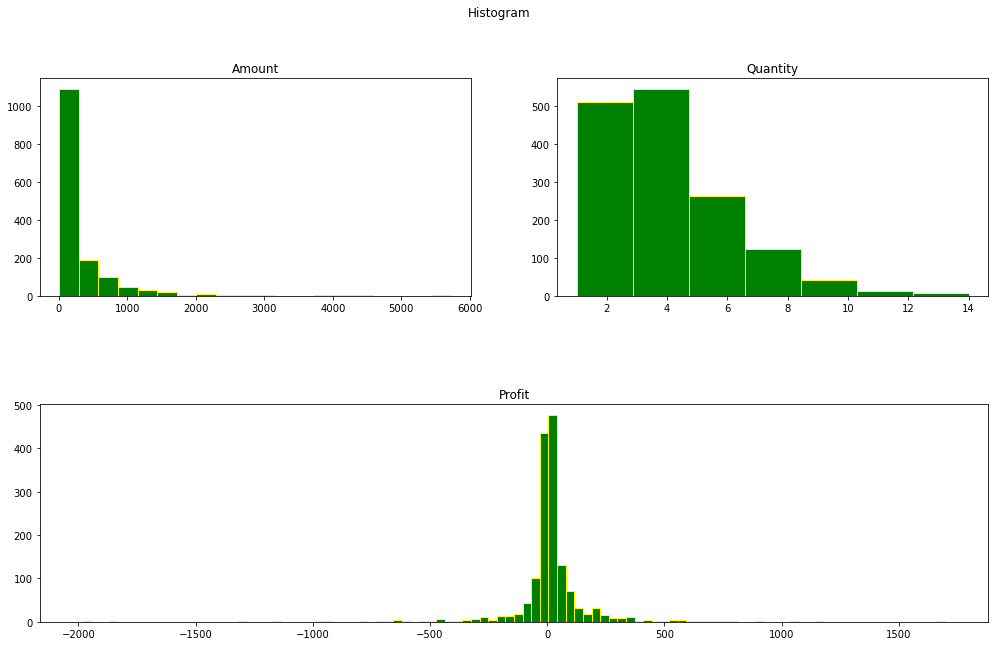

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(17,10))
plt.suptitle('Histogram',fontsize='12')
plt.subplots_adjust(hspace=.5)
plt.subplot(2, 2, 1)
plt.hist(combined.Amount, bins=20, edgecolor="yellow", color="green")
plt.title('Amount')
plt.subplot(2, 2, 2)
plt.hist(combined.Quantity, bins=7, edgecolor="yellow", color="green")
plt.title('Quantity')
plt.subplot(2, 1, 2)
plt.hist(combined.Profit, bins=100, edgecolor="yellow", color="green")
plt.title('Profit')
plt.show()

### Heatmap - Correlation

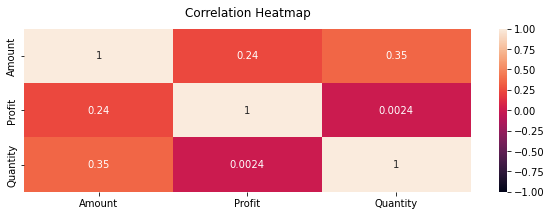

In [32]:
# Increase the size of the heatmap.
plt.figure(figsize=(10, 3))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = s.heatmap(combined[["Amount","Profit","Quantity"]].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Scatter plot
#### The scatter plot indicates Low positive (negative) correlation

Text(0.5, 1.0, 'Quantity vs Amount with Correlation 0.35')

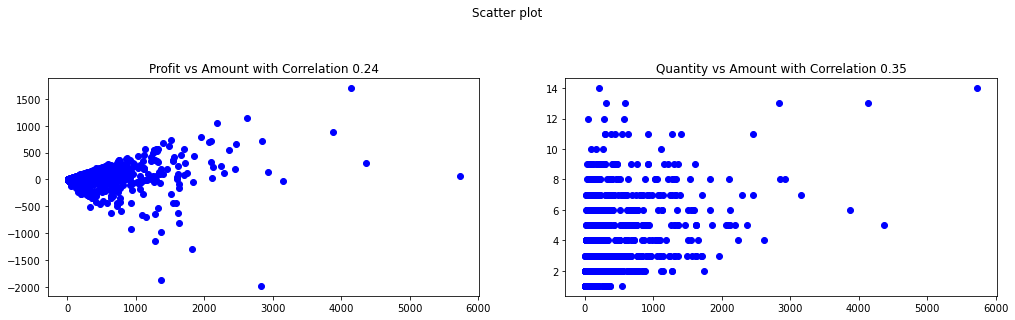

In [33]:
fig, ax = plt.subplots(1,1 , figsize=(17,10))
plt.suptitle('Scatter plot',fontsize='12')
plt.subplots_adjust(hspace=.5)
plt.subplot(2, 2, 1)
plt.scatter(combined.Amount,combined.Profit, c ="blue")
plt.title('Amount')
correlation = combined.corr()
d1=round(correlation.loc['Amount', 'Profit'],2)
plt.title(f'Profit vs Amount with Correlation {d1}')
plt.subplots_adjust(hspace=.5)
plt.subplot(2, 2, 2)
plt.scatter(combined.Amount,combined.Quantity, c ="blue")
correlation = combined.corr()
d2=round(correlation.loc['Amount', 'Quantity'],2)
plt.title(f'Quantity vs Amount with Correlation {d2}')

In [34]:
#Converting date to year month and creating a new column
combined['Order Month-Year']=combined['Order Date'].dt.strftime('%Y-%m')

In [35]:
combined.head()

,Order ID,Order Date,CustomerName,State,City,Category,Sub-Category,Amount,Profit,Quantity,Order Month-Year
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Furniture,Bookcases,1275.0,-1148.0,7,2018-01
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Stole,66.0,-12.0,5,2018-01
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,Hankerchief,8.0,-2.0,3,2018-01
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Electronics,Electronic Games,80.0,-56.0,4,2018-01
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,Electronics,Phones,168.0,-111.0,2,2018-01


## Metrics
### Who are my top 5 customers by sales


In [36]:
#grouping the data by customer name and adding them to find top 5 customers by sales
bar1=combined.groupby("CustomerName")["Amount"].sum().reset_index().sort_values(by='Amount',ascending=False).head()

<AxesSubplot:xlabel='CustomerName', ylabel='Amount'>

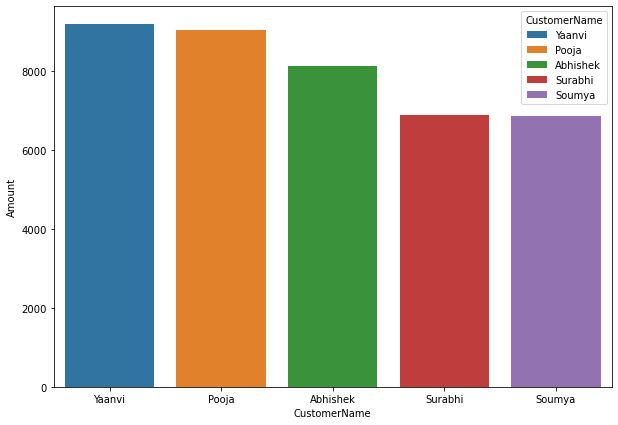

In [37]:
fig, ax = plt.subplots(1,1 , figsize=(10,7)) # creating a subplot and fixing the position at 1, and adding the size 
s.barplot(data=bar1, x="CustomerName", y="Amount", hue="CustomerName",dodge=False) 

### Top 5 customers from above:
* Yaanvi
* Pooja
* Abhishek
* Surabhi
* Soumya

### Which is the most profitable Category and Sub-category

### Category
#### Data Observation
* Clothing contributes to largest profit (46 %)

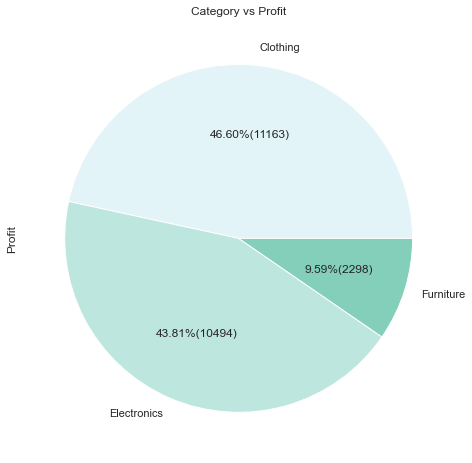

In [38]:
Prof = combined.groupby('Category')['Profit'].sum()
s.set()
colors = s.color_palette('BuGn')
Prof.plot(kind='pie', title='Category vs Profit', figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*Prof.sum()), colors=colors)
#using a lambda function to create percentages and whole numbers
plt.savefig('mypie.png')
#saving the plot to the current folder
plt.show()

### Subcategory
* Printers is the highest profitable subcategory
* Tables is the least profitable subcategory

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

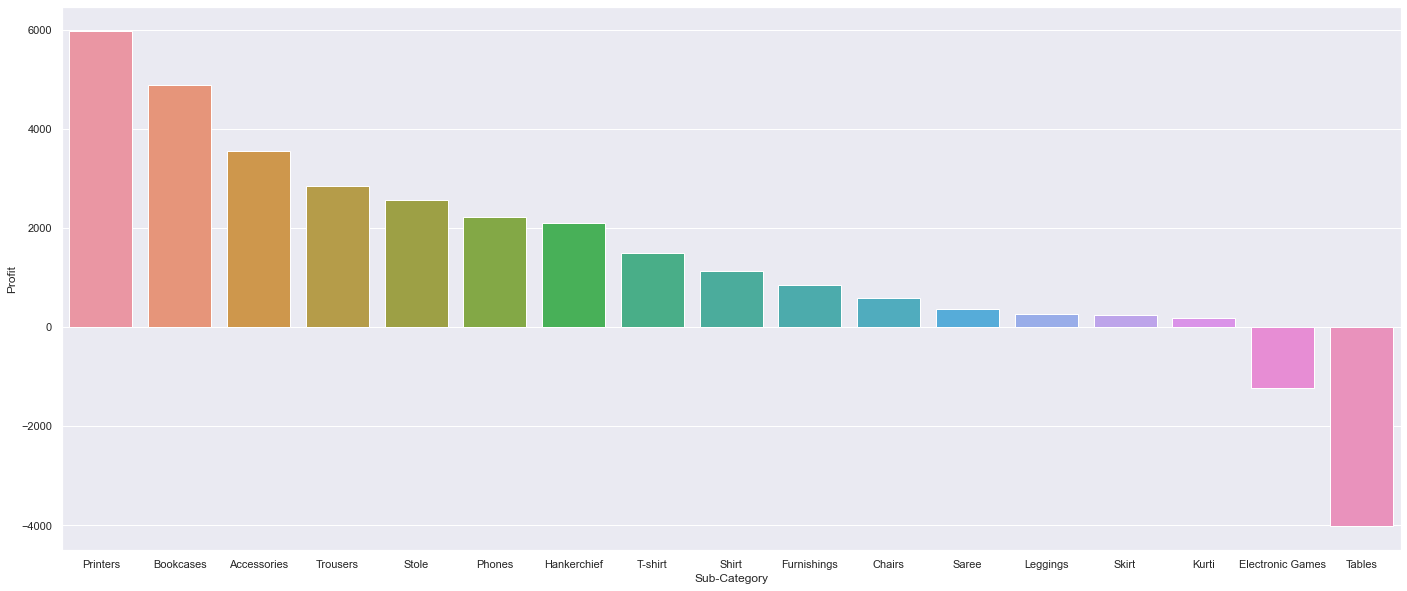

In [39]:
sub=combined.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
fig, ax = plt.subplots(1,1 , figsize=(24,10))
barplot=s.barplot(data=sub, x="Sub-Category", y="Profit",dodge=False)
plt.savefig('mybarsub.png')
barplot

### Is my top line growth increasing over time?
#### Sales over Year-month
#### Data description
* There is a increase in top line sales till 2019-01 and then there is a decline from 2019-02 (interesting to know what happened)

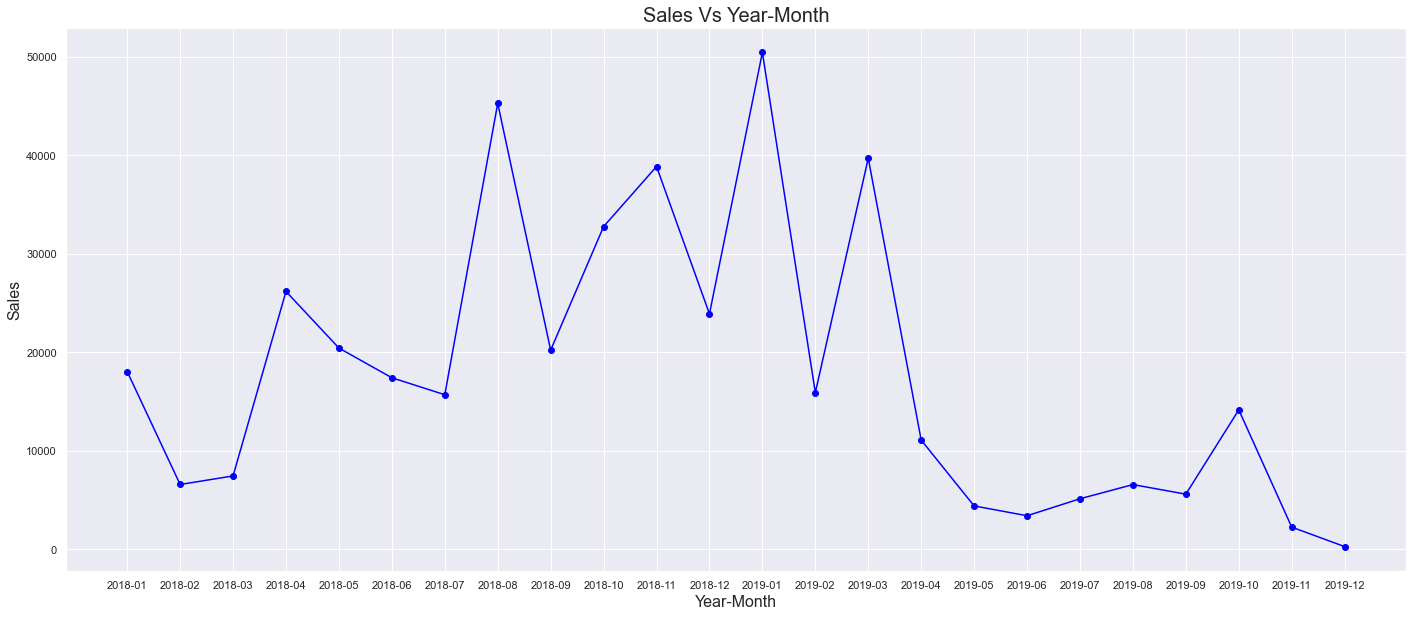

In [40]:
line=combined.groupby('Order Month-Year')['Amount'].sum().reset_index()
line
fig, ax = plt.subplots(1,1 , figsize=(24,10))
Year_month = line["Order Month-Year"]
Sales = line["Amount"]
plt.plot(Year_month, Sales, color='blue', marker='o')
plt.title('Sales Vs Year-Month', fontsize=20)
plt.xlabel('Year-Month', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.grid(True)
plt.show()

### Is my Bottom line growth increasing over time?
#### Profit over Year-month
#### Data observations
* Profit from negative to positive transition happened from 2018-01 to 2018-12

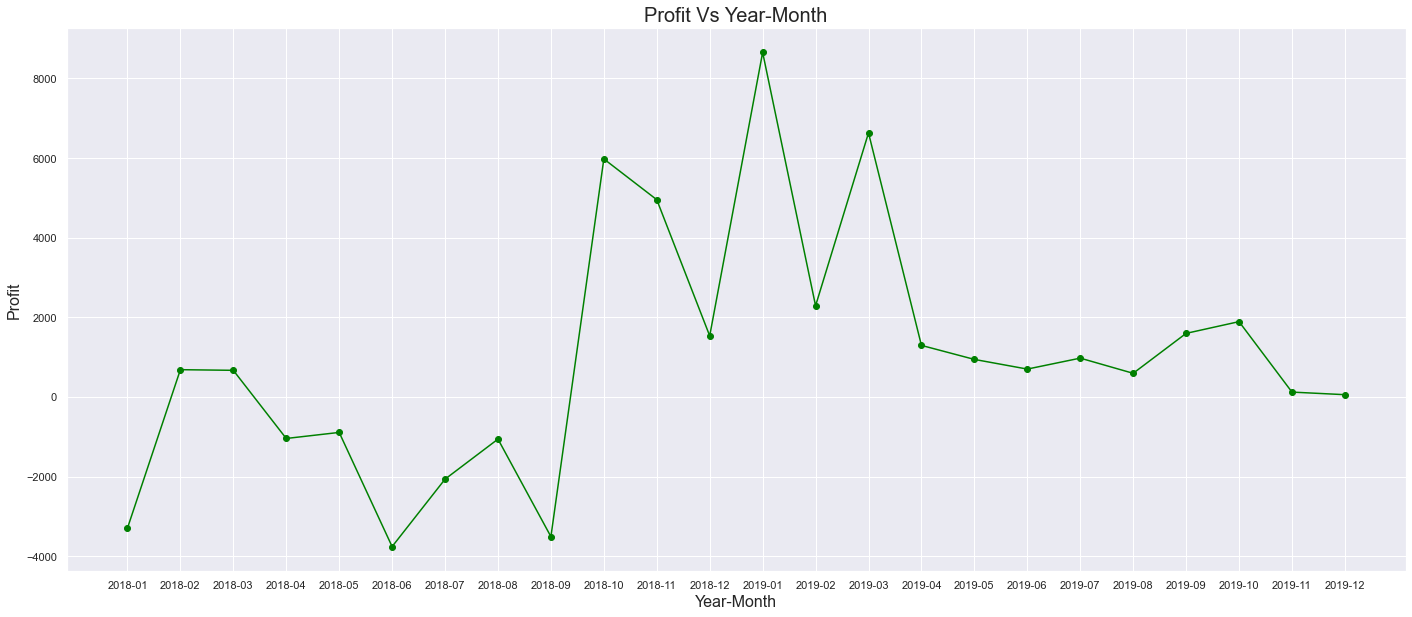

In [41]:
line=combined.groupby('Order Month-Year')['Profit'].sum().reset_index()
line
fig, ax = plt.subplots(1,1 , figsize=(24,10))
Year_month = line["Order Month-Year"]
Sales = line["Profit"]
plt.plot(Year_month, Sales, color='green', marker='o')
plt.title('Profit Vs Year-Month', fontsize=20)
plt.xlabel('Year-Month', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.grid(True)
plt.show()

### State and City wise Sales
* Which State/city is we get the highest sales from?

<AxesSubplot:title={'center':'City vs States'}, xlabel='Sales', ylabel='City'>

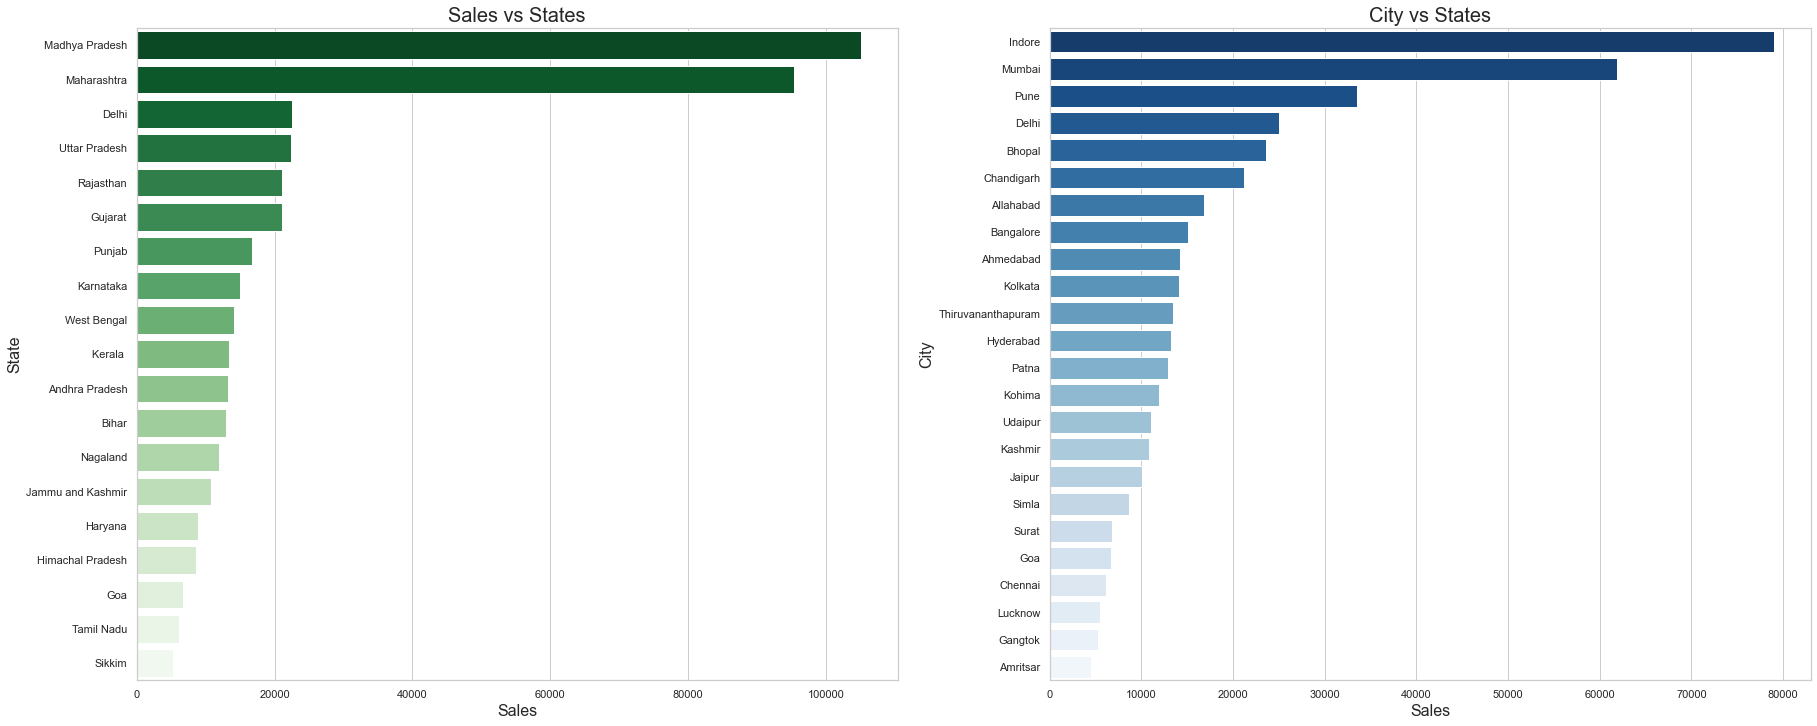

In [42]:
fig, ax = plt.subplots(1,1 , figsize=(30,30))
s.set(style="whitegrid", color_codes=True)
plt.subplots_adjust(hspace=.5)
plt.subplot(2, 2, 1)
sub=combined.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)
pal = s.color_palette("Greens_r", len(sub))
barplot=s.barplot(data=sub, x="Amount", y="State",dodge=False,orient = 'h', palette=pal)
plt.xlabel('Sales', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.title('Sales vs States', fontsize=20)
barplot
sub_1=combined.groupby('City')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)
pal = s.color_palette("Blues_r", len(sub_1))
plt.subplot(2, 2, 2)
barplot_1=s.barplot(data=sub_1, x="Amount", y="City",dodge=False,orient = 'h', palette=pal)
plt.xlabel('Sales', fontsize=16)
plt.ylabel('City', fontsize=16)
plt.title('City vs States', fontsize=20)
barplot_1

### Did we meet the target?
#### Now we merge the 3rd file to compare if category reached the target for the particular months 

In [43]:
#creating a new dataframe and storing.
target_orders= pd.read_csv("Sales target.csv")
target_orders.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [44]:
#Checking for null
target_orders.isnull().sum()

Month of Order Date    0
Category               0
Target                 0
dtype: int64

In [45]:
#checking the datatype
target_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [46]:
target_orders.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [47]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1500 non-null   object        
 1   Order Date        1500 non-null   datetime64[ns]
 2   CustomerName      1500 non-null   object        
 3   State             1500 non-null   object        
 4   City              1500 non-null   object        
 5   Category          1500 non-null   object        
 6   Sub-Category      1500 non-null   object        
 7   Amount            1500 non-null   float64       
 8   Profit            1500 non-null   float64       
 9   Quantity          1500 non-null   int64         
 10  Order Month-Year  1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 140.6+ KB


In [48]:
#Convert the column to year and month (to make it as a key)
target_orders['Month of Order Date'] = pd.to_datetime(target_orders['Month of Order Date'], format = '%b-%y')
target_orders['Month of Order Date'] = pd.to_datetime(target_orders['Month of Order Date']).dt.to_period('M')

In [49]:
combined_sales=combined.groupby(['Order Month-Year','Category'])['Amount'].sum().reset_index()

In [50]:
#converting the column date to string to join on keys
target_orders['Month of Order Date'] = target_orders['Month of Order Date'].astype(str)

In [51]:
#merging the data 
master=target_orders.merge(combined_sales,left_on='Month of Order Date',right_on='Order Month-Year',how='inner')

In [52]:
master["Year"]=pd.DatetimeIndex(master['Month of Order Date']).year
master= master[["Order Month-Year","Year","Category_x","Target","Amount"]]
master = master.rename(columns={"Category_x":"Category"})

In [53]:
master_2018=master[master["Year"]==2018]

In [54]:
master_2018=master_2018.rename(columns={"Order Month-Year":"Month_year"})

#### Comparing Target Amount with Sales Amount [Year=2018]

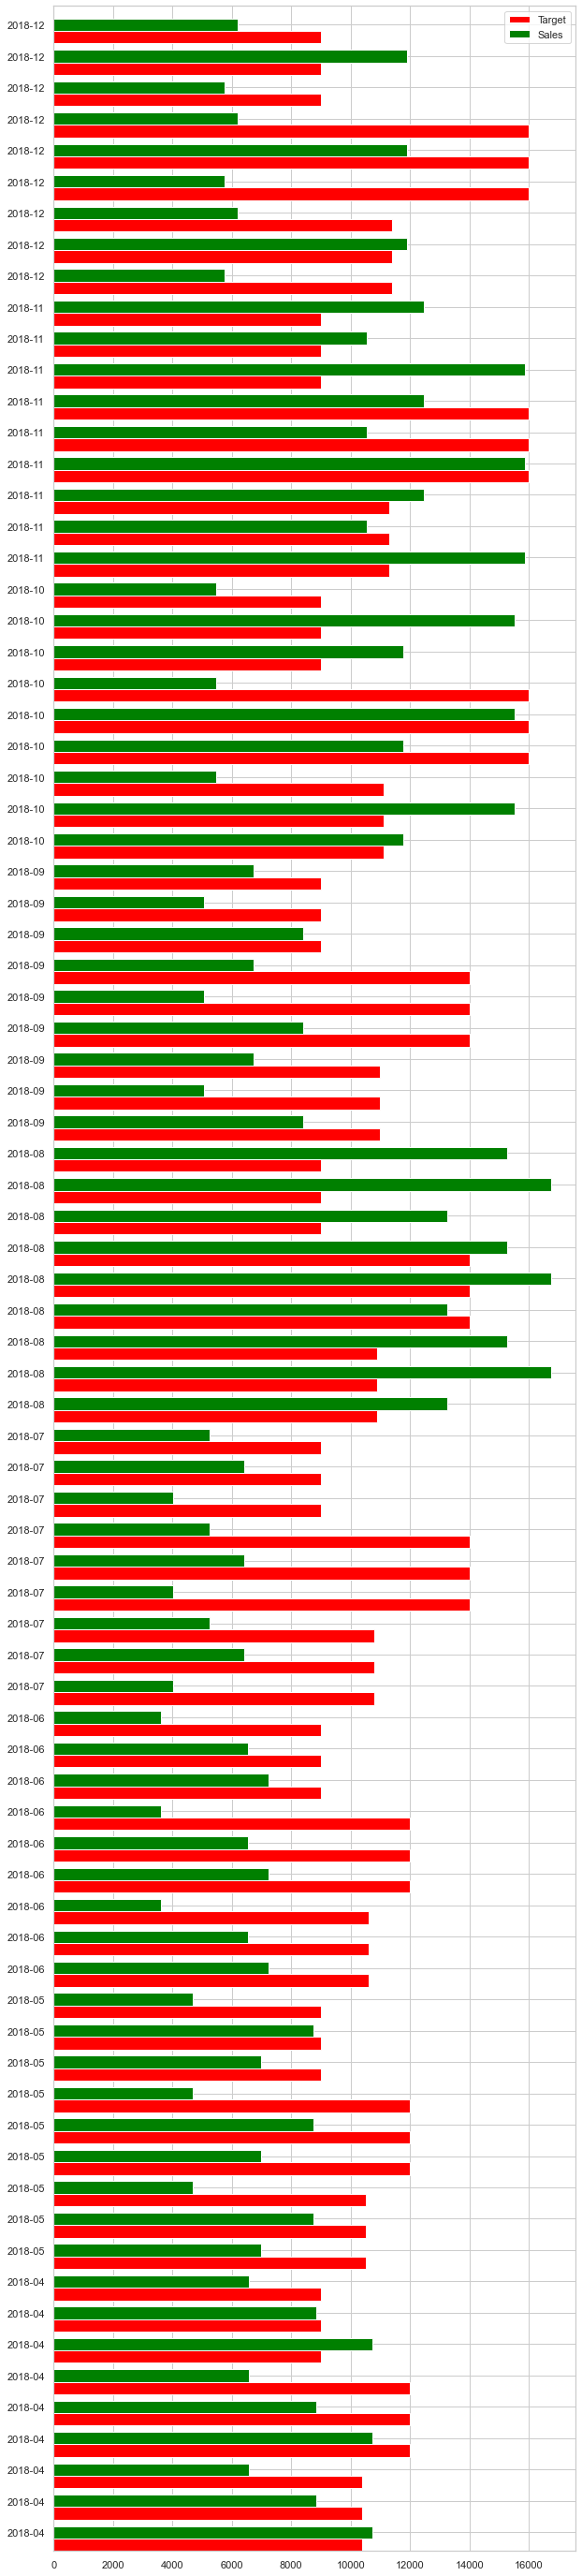

In [55]:
ind = np.arange(len(master_2018))
width = 0.4
fig, ax = plt.subplots(1,1 , figsize=(10,50))
ax.barh(ind, master_2018.Target, width, color='red', label='Target')
ax.barh(ind + width, master_2018.Amount, width, color='green', label='Sales')
ax.set(yticks=ind + width, yticklabels=master_2018.Month_year, ylim=[2*width - 1, len(master_2018)])
ax.legend()
plt.show()

In [56]:
#exporting to the csv
master.to_csv("Target_cleaned.csv")
combined.to_csv("Cleaneddata.csv")